In [ ]:
#connecting with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
import os
zip_file_path = '/content/drive/MyDrive/Projects/fashion_similaries/data (1).zip'
# extraction_directory = '/content/drive/MyDrive/PROJECT/Fashion Recommendation System using Image Features'

# zip_file_path = '/content/fashion_images.zip'
extraction_directory = '/content/fashion_images_folder/'

# Create the extraction directory if it doesn't exist
if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)

# Extract the contents of the zip file to the extraction directory
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_directory)

# List the extracted files
print("Extracted files:")
extracted_files = os.listdir(extraction_directory)
print(extracted_files[:10])

Extracted files:
['__MACOSX', 'data']


In [ ]:
import os


os.rename('/content/fashion_images_folder/data', '/content/fashion_images_folder/fashion_images')


In [ ]:
# correcting the path to include the 'fashion_images' directory and listing its contents
extraction_directory_updated = os.path.join(extraction_directory, 'fashion_images')

# list the files in the updated directory
extracted_files_updated = os.listdir(extraction_directory_updated)
extracted_files_updated[:10], len(extracted_files_updated)

(['image_631.jpg',
  'image_820.jpg',
  'image_329.jpg',
  'image_1093.jpg',
  'image_1021.jpg',
  'image_1102.jpg',
  'image_113.jpg',
  'image_747.jpg',
  'image_1648.jpg',
  'image_231.jpg'],
 331)

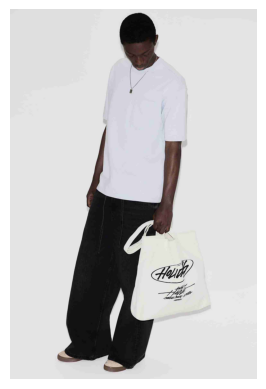

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# function to load and display an image
def display_image(file_path):
    image = Image.open(file_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# display the first image to understand its characteristics
first_image_path = os.path.join(extraction_directory_updated, extracted_files_updated[0])
display_image(first_image_path)

In [ ]:
import glob

# directory path containing your images
image_directory = '/content/fashion_images_folder/fashion_images'

image_paths_list = [file for file in glob.glob(os.path.join(image_directory, '*.*')) if file.endswith(('.jpg', '.png', '.jpeg', 'webp'))]

# print the list of image file paths
print(image_paths_list)

['/content/fashion_images_folder/fashion_images/image_631.jpg', '/content/fashion_images_folder/fashion_images/image_820.jpg', '/content/fashion_images_folder/fashion_images/image_329.jpg', '/content/fashion_images_folder/fashion_images/image_1093.jpg', '/content/fashion_images_folder/fashion_images/image_1021.jpg', '/content/fashion_images_folder/fashion_images/image_1102.jpg', '/content/fashion_images_folder/fashion_images/image_113.jpg', '/content/fashion_images_folder/fashion_images/image_747.jpg', '/content/fashion_images_folder/fashion_images/image_1648.jpg', '/content/fashion_images_folder/fashion_images/image_231.jpg', '/content/fashion_images_folder/fashion_images/image_602.jpg', '/content/fashion_images_folder/fashion_images/image_471.jpg', '/content/fashion_images_folder/fashion_images/image_263.jpg', '/content/fashion_images_folder/fashion_images/image_566.jpg', '/content/fashion_images_folder/fashion_images/image_1024.jpg', '/content/fashion_images_folder/fashion_images/im

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=base_model.input, outputs=base_model.output)

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded)


def extract_features(model, preprocessed_img):
    features = model.predict(preprocessed_img)
    flattened_features = features.flatten()
    normalized_features = flattened_features / np.linalg.norm(flattened_features)
    return normalized_features

all_features = []
all_image_names = []

for img_path in image_paths_list:
    preprocessed_img = preprocess_image(img_path)
    features = extract_features(model, preprocessed_img)
    all_features.append(features)
    all_image_names.append(os.path.basename(img_path))



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 990ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 927ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 554ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539

In [ ]:
from scipy.spatial.distance import cosine

def recommend_fashion_items_cnn(input_image_path, all_features, all_image_names, model, top_n=5):
    # pre-process the input image and extract features
    preprocessed_img = preprocess_image(input_image_path)
    input_features = extract_features(model, preprocessed_img)

    # calculate similarities and find the top N similar images
    similarities = [1 - cosine(input_features, other_feature) for other_feature in all_features]
    similar_indices = np.argsort(similarities)[-top_n:]

    # filter out the input image index from similar_indices
    similar_indices = [idx for idx in similar_indices if idx != all_image_names.index(input_image_path)]

    # display the input image
    plt.figure(figsize=(15, 10))
    plt.subplot(1, top_n + 1, 1)
    plt.imshow(Image.open(input_image_path))
    plt.title("Input Image")
    plt.axis('off')

    # display similar images
    for i, idx in enumerate(similar_indices[:top_n], start=1):
        image_path = os.path.join('/content/fashion_images_folder/fashion_images', all_image_names[idx])
        plt.subplot(1, top_n + 1, i + 1)
        plt.imshow(Image.open(image_path))
        plt.title(f"Recommendation {i}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


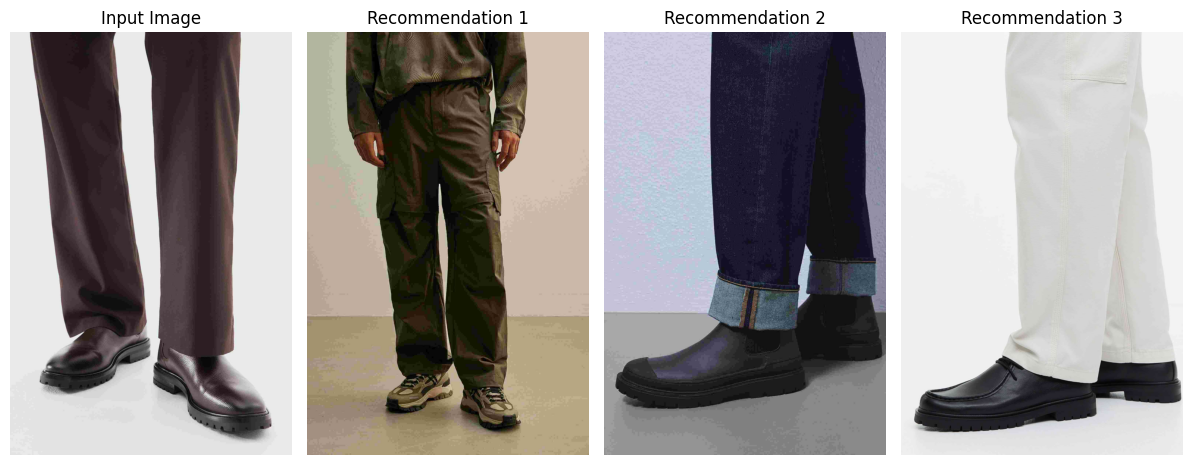

In [ ]:
input_image_path = '/content/fashion_images_folder/fashion_images/image_113.jpg'
recommend_fashion_items_cnn(input_image_path, all_features, image_paths_list, model, top_n=4)